In [436]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn import metrics

In [437]:
data = pd.read_csv("Customer_Churn.csv")

In [438]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [439]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [440]:
data.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [441]:
type(data)

pandas.core.frame.DataFrame

In [442]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [443]:
data_new = data.replace("Yes",1)
data_new1 = data_new.replace("No",0)
data_new2 = data_new1.replace("No internet",2)

In [444]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [445]:
customer_5=data.iloc[:,4]
customer_5.head()

0    No
1    No
2    No
3    No
4    No
Name: Dependents, dtype: object

In [446]:
customer_15 = data.iloc[:,14]
customer_15.head()

0    No
1    No
2    No
3    No
4    No
Name: StreamingMovies, dtype: object

In [447]:
my_subset =(data['gender']=='Male') & (data['SeniorCitizen']==1) &(data['PaymentMethod']=='Electronic check')
senior_male_electronic=data[my_subset]
senior_male_electronic.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No


In [448]:
senior_male_electronic[['gender','SeniorCitizen','PaymentMethod']]

,gender,SeniorCitizen,PaymentMethod
20,Male,1,Electronic check
55,Male,1,Electronic check
57,Male,1,Electronic check
78,Male,1,Electronic check
91,Male,1,Electronic check
...,...,...,...
6837,Male,1,Electronic check
6894,Male,1,Electronic check
6914,Male,1,Electronic check
6967,Male,1,Electronic check


In [449]:
my_second_subset=(data['tenure']>70) | (data['MonthlyCharges']>100)
customer_total_tenure= data[my_second_subset]
customer_total_tenure.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No


In [450]:
customer_total_tenure[['tenure','MonthlyCharges']]

,tenure,MonthlyCharges
8,28,104.80
12,58,100.35
13,49,103.70
14,25,105.50
15,69,113.25
...,...,...
7023,63,103.50
7034,67,102.95
7037,72,21.15
7039,72,103.20


In [451]:
my_another_subset =(data['Contract']=="Two year") & (data['PaymentMethod']=="Mailed check") &(data['Churn']=="Yes")
two_mail_yes= data[my_another_subset]
two_mail_yes.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


In [452]:
two_mail_yes[['Contract','PaymentMethod','Churn']]

,Contract,PaymentMethod,Churn
268,Two year,Mailed check,Yes
5947,Two year,Mailed check,Yes
6680,Two year,Mailed check,Yes


In [453]:
customer_333=data.sample(n=333)
customer_333.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5359,5143-EGQFK,Female,1,No,No,10,No,No phone service,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Electronic check,29.65,291.4,Yes
182,9367-WXLCH,Male,0,No,No,8,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Month-to-month,No,Bank transfer (automatic),84.50,662.65,Yes
4431,8630-FJLIB,Female,0,No,No,18,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,69.80,1221.65,No
3915,3115-JPJDD,Female,0,Yes,No,59,Yes,No,Fiber optic,Yes,...,Yes,No,No,No,One year,Yes,Credit card (automatic),81.25,4639.45,No
3551,7594-RQHXR,Female,0,No,Yes,1,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,79.60,79.6,Yes


In [454]:
data['Churn'].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [455]:
data['Contract'].value_counts()

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

## Data Visualization

## Bar plot

InternetService
Fiber optic    3096
DSL            2421
0              1526
Name: count, dtype: int64
2421
3096
1526


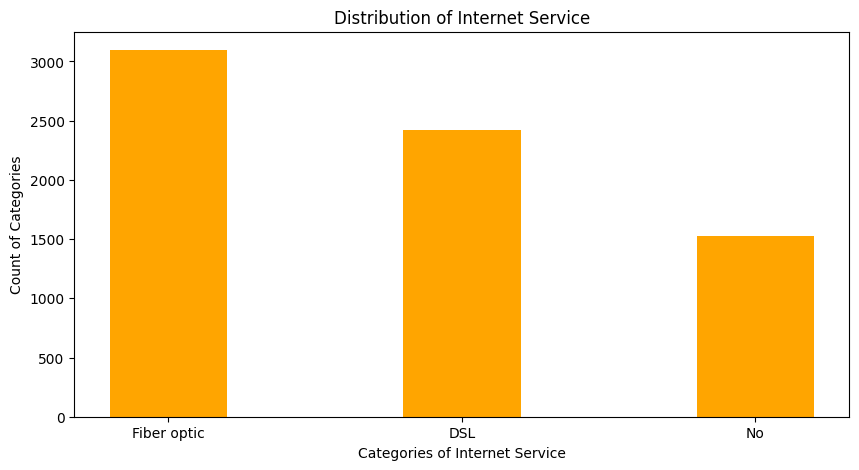

In [456]:
import numpy as np
import matplotlib.pyplot as plt 
data = pd.read_csv("Customer_Churn.csv")
data_new = data.replace("Yes",1)
data_new1 = data_new.replace("No",0)
data_new2 = data_new1.replace("No internet",2)
 

internet = data_new2['InternetService'].value_counts()
print(internet)
dsl = data['InternetService'].value_counts()['DSL']
fiber = data['InternetService'].value_counts()['Fiber optic']
no = data['InternetService'].value_counts()['No']
print(dsl)
print(fiber)
print(no)



# creating the dataset
data = { 'Fiber optic':fiber,'DSL':dsl, 'No':no}
Categories = list(data.keys())
Count = list(data.values())
 
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(Categories, Count, color ='orange', 
        width = 0.4)

plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

## Histogram plot

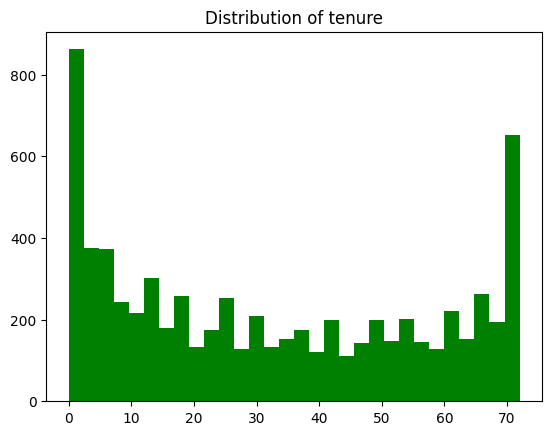

In [457]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
 
# Load dataset

data = pd.read_csv("Customer_Churn.csv")
data_new = data.replace("Yes",1)
data_new1 = data_new.replace("No",0)
data_new2 = data_new1.replace("No internet",2)


plt.hist(data['tenure'],bins=30,color='green')
plt.title('Distribution of tenure')
plt.show()

# sns.histplot(data = data_new2, x = "tenure", kde = True,color='green',bins = 30).set(title="Distribution of tenure") 

## Scatter plot

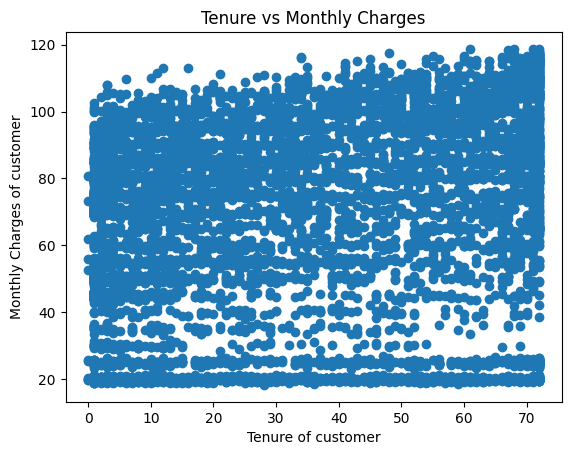

In [458]:
plt.scatter(x=data['tenure'],y=data['MonthlyCharges'])
plt.xlabel('Tenure of customer')
plt.ylabel('Monthly Charges of customer')
plt.title('Tenure vs Monthly Charges')
plt.show()

## Box Plot

<Axes: title={'center': 'tenure'}, xlabel='[Contract]'>

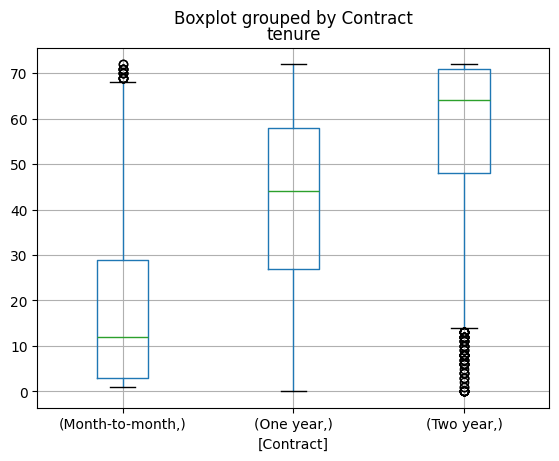

In [459]:
data.boxplot(column=['tenure'],by=['Contract'])

## Linear Regresssion

In [460]:
x = data["tenure"]
y = data["MonthlyCharges"]

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.7,random_state = 0)

model = linear_model.LinearRegression()
model.fit(x_train.values.reshape(-1, 1),y_train) # Convert x_train to a NumPy array before reshaping

data_predicted = model.predict(x_test.values.reshape(-1, 1)) # Reshape x_test to a 2D array

print("root mean squared error is:- " , root_mean_squared_error(y_test,data_predicted))

error = root_mean_squared_error(y_test,data_predicted)

root mean squared error is:-  28.98005702002485


In [461]:
error

28.98005702002485

## Logistic Regression

In [462]:

# Import the LogisticRegression class from the sklearn.linear_model module
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split 
# import the metrics module
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')

# Assuming 'Churn' is your target variable and 'MonthlyCharges' is a predictor
x1 = data_new2["MonthlyCharges"]
y1 = data_new2["Churn"]

# Split data into training and testing sets
x1_train, x1_test,y1_train, y1_test = train_test_split(x1, y1,test_size=0.65)

# Create and fit the model
model = LogisticRegression()
model.fit(x1_train.values.reshape(-1, 1), y1_train)

y1_pred = model.predict(x1_test.values.reshape(-1, 1))

# comparing actual response values (y_test)
# with predicted response values (y_pred)
print("Logistic Regression model accuracy(in %):",
      metrics.accuracy_score(y1_test, y1_pred)*100)

# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y2_pred)
print(cm)

print("The Accuracy of logistic regression via confusion matrix is:- ",(accuracy_score(y1_test,y1_pred)*100))

Logistic Regression model accuracy(in %): 74.29008300567934
[[3111  547]
 [ 687  586]]
The Accuracy of logistic regression via confusion matrix is:-  74.29008300567934


## random Forest Classifier and confusion matrix

[[3147  501]
 [ 717  566]]
The Accuracy of Random Forest Classifier (in % ) is:-  75.29912796592984


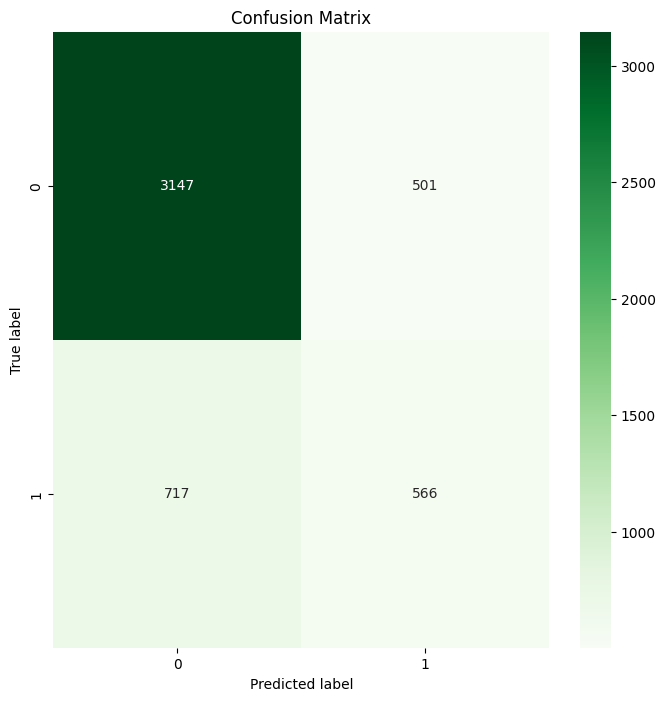

In [482]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score # make sure that this import statement is executed
#accuracy_score(y2_test, y2_pred) 

data = pd.read_csv("Customer_Churn.csv")
data_new = data.replace("Yes",1)
data_new1 = data_new.replace("No",0)
data_new2 = data_new1.replace("No internet",2)
# Access the data from your DataFrame using the column names
# Access the data from your DataFrame using the column names
x2 = data_new2[["tenure", "MonthlyCharges"]] # Use a list of column names to select multiple columns
y2 = data_new2["Churn"]
# Now x2 and y2 will have the same number of samples
x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2,test_size = 0.7)

classifier = RandomForestClassifier(n_estimators= 10, criterion = "entropy")

classifier.fit(x2_train, y2_train)

y2_pred = classifier.predict(x2_test)

# creating confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y2_test, y2_pred)
print(cm)

print("The Accuracy of Random Forest Classifier (in % ) is:- ",accuracy_score(y2_test,y2_pred)*100)

# Create a Confusion Matrix
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

## decision tree

In [464]:
from sklearn.tree import DecisionTreeClassifier, plot_tree 
decision_tree=DecisionTreeClassifier() 

x3 = data_new2[["tenure", "MonthlyCharges"]] # Use a list of column names to select multiple columns
y3 = data_new2["Churn"]
# Now x2 and y2 will have the same number of samples
x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3,test_size = 0.7,random_state=0)

x3_train.shape, x3_test.shape, y3_train.shape,y3_test.shape


((2112, 2), (4931, 2), (2112,), (4931,))

In [465]:
decision_tree.fit(x3_train,y3_train)

DecisionTreeClassifier()

In [466]:
y3_pred=decision_tree.predict(x3_test)
y3_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [467]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(y3_test,y3_pred)

array([[2926,  653],
       [ 752,  600]], dtype=int64)

In [468]:
print("Accuracy of decision tree confusion matrix (in % )is :- ", accuracy_score(y3_test,y3_pred)*100)

Accuracy of decision tree confusion matrix (in % )is :-  71.50679375380248


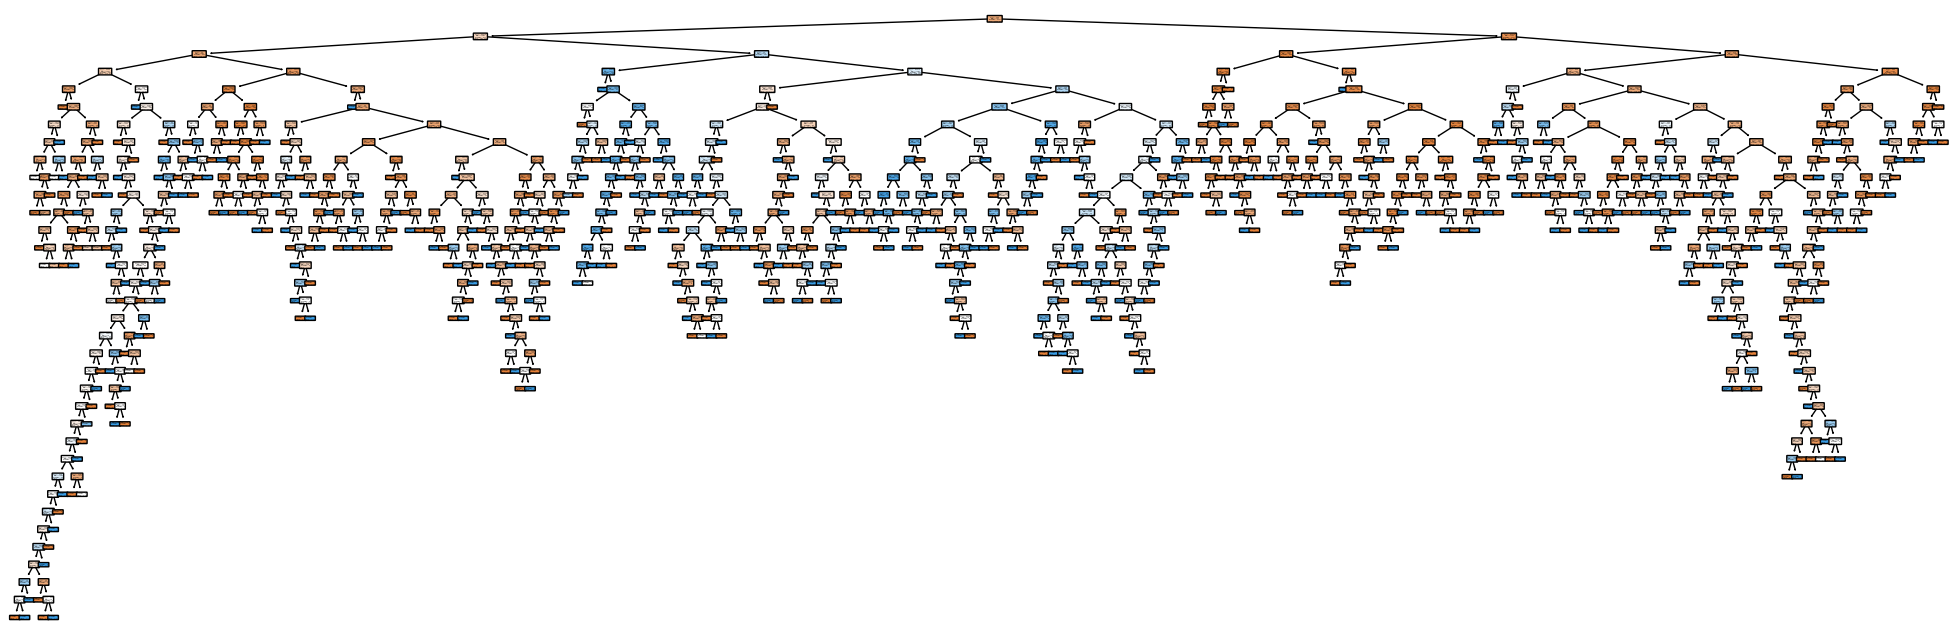

In [481]:


import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
plot_tree(decision_tree, filled=True,rounded=True)
plt.show()